In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

In [2]:
uri = 'https://gist.githubusercontent.com/guilhermesilveira/4d1d4a16ccbf6ea4e0a64a38a24ec884/raw/afd05cb0c796d18f3f5a6537053ded308ba94bf7/car-prices.csv'
dados = pd.read_csv(uri)

In [3]:
dados.head()

,Unnamed: 0,mileage_per_year,model_year,price,sold
0,0,21801,2000,30941.02,yes
1,1,7843,1998,40557.96,yes
2,2,7109,2006,89627.50,no
3,3,26823,2015,95276.14,no
4,4,7935,2014,117384.68,yes


In [4]:
a_renomear = {'mileage_per_year':'milhas_por_ano',
              'model_year':'ano_do_modelo',
              'price':'preco',
              'sold':'vendido'}

dados.rename(columns=a_renomear, inplace=True)

dados.head()

,Unnamed: 0,milhas_por_ano,ano_do_modelo,preco,vendido
0,0,21801,2000,30941.02,yes
1,1,7843,1998,40557.96,yes
2,2,7109,2006,89627.50,no
3,3,26823,2015,95276.14,no
4,4,7935,2014,117384.68,yes


In [5]:
a_trocar = {'yes': 1,
'no':0}

dados['vendido'] = dados['vendido'].map(a_trocar)
dados.head()

,Unnamed: 0,milhas_por_ano,ano_do_modelo,preco,vendido
0,0,21801,2000,30941.02,1
1,1,7843,1998,40557.96,1
2,2,7109,2006,89627.50,0
3,3,26823,2015,95276.14,0
4,4,7935,2014,117384.68,1


In [6]:
from datetime import datetime

ano_atual = datetime.today().year
dados['idade_do_modelo'] = ano_atual - dados.ano_do_modelo
dados.head()

,Unnamed: 0,milhas_por_ano,ano_do_modelo,preco,vendido,idade_do_modelo
0,0,21801,2000,30941.02,1,20
1,1,7843,1998,40557.96,1,22
2,2,7109,2006,89627.50,0,14
3,3,26823,2015,95276.14,0,5
4,4,7935,2014,117384.68,1,6


In [7]:
dados['km_por_ano'] = dados.milhas_por_ano * 1.60934
dados.head()

,Unnamed: 0,milhas_por_ano,ano_do_modelo,preco,vendido,idade_do_modelo,km_por_ano
0,0,21801,2000,30941.02,1,20,35085.22134
1,1,7843,1998,40557.96,1,22,12622.05362
2,2,7109,2006,89627.50,0,14,11440.79806
3,3,26823,2015,95276.14,0,5,43167.32682
4,4,7935,2014,117384.68,1,6,12770.11290


In [8]:
dados = dados.drop(columns = ['Unnamed: 0','milhas_por_ano','ano_do_modelo'], axis=1)
dados.head()

,preco,vendido,idade_do_modelo,km_por_ano
0,30941.02,1,20,35085.22134
1,40557.96,1,22,12622.05362
2,89627.50,0,14,11440.79806
3,95276.14,0,5,43167.32682
4,117384.68,1,6,12770.11290


In [9]:
x = dados[['preco','idade_do_modelo','km_por_ano']]
y = dados['vendido']


from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

SEED = 20 
np.random.seed(SEED)

treino_x, teste_x, treino_y,teste_y = train_test_split(x,y,test_size=0.25)
print('Treinamos com %d elementos e testaremos com %d elementos' %(len(treino_x), len(teste_x)) )


modelo = SVC()
modelo.fit(treino_x,treino_y)
previsoes = modelo.predict(teste_x)

acuracia = accuracy_score(teste_y,previsoes)
print('A acurácia foi de %.2f%%' %(acuracia*100))

Treinamos com 7500 elementos e testaremos com 2500 elementos
A acurácia foi de 76.40%


## Vamos usar um classificador simples(burro), para definir o quão bom esta as nossas previsoes 

In [10]:
from sklearn.dummy import DummyClassifier # um classificador simples, para definir o quão bom esta as nossas previsoes 

dummy_stratfied = DummyClassifier()
dummy_stratfied.fit(treino_x,treino_y)
acuracia = dummy_stratfied.score(teste_x,teste_y)


print('A acurácia do Dummy_stratied foi de %.2f%%' %(acuracia*100))

A acurácia do Dummy_stratied foi de 52.56%


C:\Users\Guilherme\Anaconda3\lib\site-packages\sklearn\dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)


In [11]:
from sklearn.dummy import DummyClassifier

dummy_mostfrequent = DummyClassifier()
dummy_mostfrequent.fit(treino_x,treino_y)
acuracia = dummy_mostfrequent.score(teste_x,teste_y)


print('A acurácia do Dummy_mostfrequent foi de %.2f%%' %(acuracia*100))

A acurácia do Dummy_mostfrequent foi de 50.56%


In [12]:
from sklearn.preprocessing import StandardScaler # préprocessamento dos dados, ajustando as escalas


from sklearn.svm import SVC # Modelo de previsão
from sklearn.metrics import accuracy_score 
from sklearn.model_selection import train_test_split 

SEED = 5 
np.random.seed(SEED)

raw_treino_x, raw_teste_x, treino_y,teste_y = train_test_split(x,y,test_size=0.25)
print('Treinamos com %d elementos e testaremos com %d elementos' %(len(treino_x), len(teste_x)) )

#Vamos reescalar os conjunto
scaler = StandardScaler()
scaler.fit(raw_treino_x)
treino_x = scaler.transform(raw_treino_x)
teste_x = scaler.transform(raw_teste_x)

modelo = SVC()
modelo.fit(treino_x,treino_y)
previsoes = modelo.predict(teste_x)

acuracia = accuracy_score(teste_y,previsoes)
print('A acurácia foi de %.2f%%' %(acuracia*100))

Treinamos com 7500 elementos e testaremos com 2500 elementos
A acurácia foi de 76.80%


##  Arvore de decisões -  Este método mostra a decisão tomada pelo algoritimo

### Obs: esse modelo funciona bem mesmo sem fazer a normalização das escalas 

In [50]:
from sklearn.tree import DecisionTreeClassifier # Modelo de previsão em ARVORE

from sklearn.preprocessing import StandardScaler 
from sklearn.metrics import accuracy_score 
from sklearn.model_selection import train_test_split 

SEED = 5 
np.random.seed(SEED)

raw_treino_x, raw_teste_x, treino_y,teste_y = train_test_split(x,y,test_size=0.25)
print('Treinamos com %d elementos e testaremos com %d elementos' %(len(treino_x), len(teste_x)) )


modelo = DecisionTreeClassifier(max_depth = 3) # profundidade da arvore
modelo.fit(raw_treino_x,treino_y)
previsoes = modelo.predict(raw_teste_x)

acuracia = accuracy_score(teste_y,previsoes)
print('A acurácia foi de %.2f%%' %(acuracia*100))

Treinamos com 7500 elementos e testaremos com 2500 elementos
A acurácia foi de 78.76%


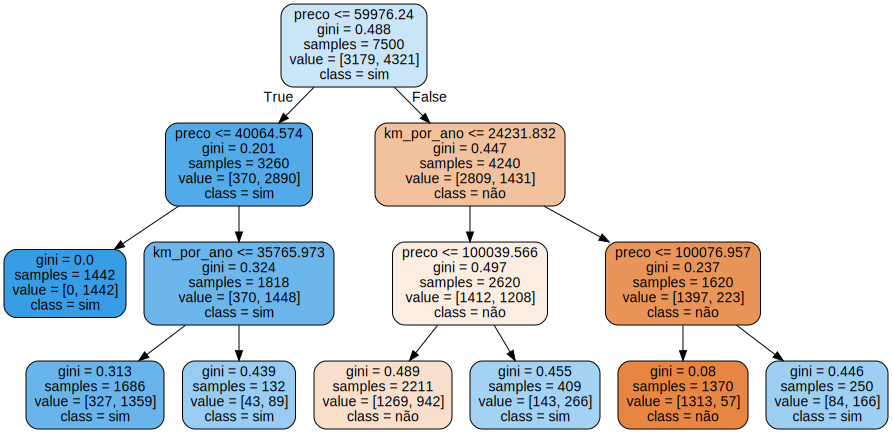

In [51]:
from sklearn.tree import export_graphviz
import graphviz

features = x.columns
dot_data = export_graphviz(modelo, out_file=None,
                           filled = True, rounded = True,
                           feature_names = features,
                          class_names = ["não", "sim"])
grafico = graphviz.Source(dot_data)
grafico